<a href="https://colab.research.google.com/github/HamzahSiddiquipvt/MobilePhone-priceRange-HamzaSiddiqui/blob/main/AB_MobilePhonePriceRange_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

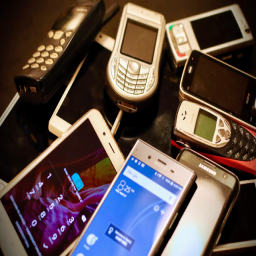

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Hamza Siddiqui

# **Project Summary -**

In the era of technical advancement, mobile phones play a very significant role.Mobile prices are an important reflection of the Humans and some ranges are of great interest for both buyers and sellers.

And with an overwhelming demand for them, mobile phone manufacturers develop them to suit every pocket.

From mobile phones as cheap as those in the range of hundereds to those in lakhs.

The price of a mobile phone depends on a lot of factors.
Its physical dimensions like the height, weight and width,
Internal memory and RAM
Camera quality, presence of bluetooth, 4G etc

In this project I aim to build a Multi-Class classification model to find the relation between features of a mobile phone and its selling price.
The model will predict the price range indicating how high the price is.

**About the dataset**
The dataset contains 2000 rows and 21 columns.
The column 'Price_range' is indicative of the range in which the cost of the mobile phone falls(0 - low cost, 1 - mid cost, 2- high cost, 3 - very high cost)

The dataset shall be checked for null or missing values and dealt with accordingly.

**Data Preprocessing**
Data preprocessing is an important step in the data mining process. The phrase “garbage in, garbage out” is particularly applicable to data mining and machine learning projects. Data-gathering methods are often loosely controlled, resulting in out-of-range values, impossible data combinations, missing values, etc.

I aim to use **Exploratory Data Analysis** to understand the relationship of various factors with the price and **outlier detection**.
Feature engineering to deal with **multicollinearity**.

Various **supervised models for classification** will be used like
**Logistic Regression**
**Random forest with hyperparameter tuning**
**Decison trees with hyperparameter tuning**

**Confusion matrices** shall be used evaluate the performances of each model.


From the business persperctive, this shall be useful for the manufacturers to understand the precedence and price their upcoming models accordingly.

For customers it will help them estimate the price of a model they are interested in even before its launch.

# **GitHub Link -**

https://github.com/HamzahSiddiquipvt/MobilePhone-priceRange-HamzaSiddiqui.git ...

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal
Memory, etc) and its selling price.

In this problem, we do not have to predict the actual price but a
price range indicating how high the price is.**

## **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***



## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

### Dataset First View

In [ ]:
# Loading the dataset

try:
  df_Master = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

  df_Master_copy = df_Master                                                        #Creating a copy to preserve original data
  #Return the first 5 rows of the DataFrame
  df_Master.head()

except:
  print("There was a problem loading the file")


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('\n', f'The number of rows dataset is : {df_Master.shape[0] }')
print('\n', f'The number of columns of the dataset is : {df_Master.shape[1] }')
print('\n', f'The dimension of the dataset is : {df_Master.shape }')            #To get number of rows and columns in the dataset

### Dataset Information

In [ ]:
# Dataset Info
df_Master.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Number of duplicate records = " + str(len(df_Master[df_Master.duplicated()])))

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_Master.isna().any()

### What did you know about your dataset?

1. The dataset contains 2000 rows and 21 columns
2. There are no null or duplicate values
3. All the columns are numerical
4. Price range column in categorical
5. Some 0 values for screen dimensions and pixels need to be handled accordingly


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(df_Master.columns)

In [ ]:
# Dataset Describe
df_Master.describe().T                                                                        #Transposing for better understanding

### Variables Description

df_Master - Data set

df_Master_copy - Copy of the dataset

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df_Master.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

'''There are no missing values, but certain values like screen width, screen height,
 pixel height, pixel width, weight cannot be 0. Hence assigning them with mean values'''

colNames =['sc_w','px_height','sc_h','px_width','mobile_wt']

for col in colNames:
  print("Total zero values in " + str(col) + "= " + str(len(df_Master[df_Master[col] == 0])))
  df_Master[col][df_Master[df_Master[col] == 0].index] = df_Master[col].mean()

print()
for col in colNames:
  print("Total zero values after handling " + str(col) + "= " + str(len(df_Master[df_Master[col] == 0])))

### What all manipulations have you done and insights you found?

Some 0 values for screen dimensions and pixels and had to be handled accordingly




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables....***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
countofEachRange = df_Master['price_range'].value_counts()                      #Finding ratio of each mobile range (0,1,2 and 3)
print(countofEachRange)

print("********************************************************************")

price_plot=countofEachRange.plot(kind='pie')                                    #Plotting the contribution of each range on a pie chart
plt.title("Mobile count for each price range")
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts show the size of items (called wedge) in one data series, proportional to the sum of the items. The data points in a pie chart are shown as a percentage of the whole pie. Since we wanted to understand what percentage of mobile phones belong to each category, we use a pie chart

##### 2. What is/are the insight(s) found from the chart?

We understand from the graph that there are equal number of records in the dataset(500 each) for 0,1,2 and 3 i.e  Cheap, Mid, High and Very high priced mobile phones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since data for all categories in is the same ratio, it might be useful for our model

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
x =df_Master.groupby(['price_range'])['battery_power'].mean()                   #Finding mean of battery power of each category
print(x)
print("********************************************************** \n\n")
battery_plot=x.plot(kind='bar', color = 'maroon')
plt.title("Average battery power of each category")
plt.xlabel("Price Range Category")
plt.ylabel("Average Battery power")

plt.show()

##### 1. Why did you pick the specific chart?

In order to show the average battery power of each category, and to establish a relationship between higher battery life and higher price I used this graph. Since, price range is categorical, bar graph was more suitable

##### 2. What is/are the insight(s) found from the chart?

The graph shows that higher range mobile phones have better battery power than the low range mobile phones.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This inference will help us estimate the price range of a mobile phone, given the battery power along with other features.

#### Chart - 3

In [ ]:
# Chart - 3 Outlier detection
plt.figure(figsize=(15,15))
for index,item in enumerate([i for i in df_Master.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  plt.title(str(item))
  sns.boxplot(df_Master[item])
print("\n")


##### 1. Why did you pick the specific chart?

Box plots are very useful for outlier detection. They indicate variability outside the upper and lower quartiles

##### 2. What is/are the insight(s) found from the chart?

I infer that there are no significant outliers in the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Presence of outliers can negatively affect the predictibility of a model. Since we have established that there are no outliers, the model developed will be useful from the business point of view.


#### Chart - 4

In [ ]:
data1 = df_Master.groupby(['price_range'])['ram'].mean()
print(data1)
print("\n")
fig,axes = plt.subplots(1,2, figsize = (12,6))
sns.boxplot(data=df_Master, x='price_range', y='ram',ax=axes[0])
fig = plt.plot(figsize=(15,5))
sns.scatterplot(data1,s=150,color="red")
plt.show()

##### 1. Why did you pick the specific chart?

We have used box plots and scatter plots.
Here box plots help us understand if there are values in a particular range which are significantly higher or lower than the other values of the same price range.
The scatter plot helps us understand how the average RAM size increases with price range.

##### 2. What is/are the insight(s) found from the chart?

We infer that the very high cost mobile phones have the best RAM, while it decreases with the decrease in cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above chart establishes a relationship between RAM and the price of a phone. This will help businesses establish a cost of their models given the specifications.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_Master, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df_Master, x='price_range', y='px_height', ax=axs[1])
plt.show()


##### 1. Why did you pick the specific chart?

The line charts are used to explain the distribution of values across a sample and the box plots are useful in identifying any irregularity in the data. Hence I have used them to understand how pixels vary with the price range.

#####2. What is/are the insight(s) found from the chart?

There is a continuous increase in pixel width as we move from Low cost to Very high cost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

#### Chart - 6

In [ ]:
# Chart - 4 visualization code
correlation = df_Master.corr()
plt.figure(figsize = [15,10])
sns.heatmap(correlation, cmap = 'PiYG', annot = True)


##### 1. Why did you pick the specific chart?

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix.Hence I have used it to understand the relation between different features.

##### 2. What is/are the insight(s) found from the chart?

There is a high correlation between pc & fc(front and back camera) and sc_w & sc_h (screen width and height), px_width & px_height. Also, the price of a mobile phone and its RAM are very highly correlated.

##**Feature Engineering & Data Pre-Processing**


As we see, there is a high correlation between pc & fc(front and back camera) and sc_w & sc_h (screen width and height).

pc & fc :                   0.64

four_g & three_g :          0.58

pixel_width & pixel_height: 0.51

sc_w & sc_h :               0.50


In order to deal with multicollinearity, I am combining these features.**bold text**

In [ ]:
#Finding aggregate of correlated columns and assigning the value to a new column

df_Master['dimension'] = df_Master[['sc_w','sc_h']].mean(axis=1).round(2)
df_Master['camera'] = df_Master[['pc','fc']].mean(axis=1).round(2)
df_Master['internet'] = df_Master[['four_g','three_g']].mean(axis=1).round(2)
df_Master['pixel'] = df_Master[['px_width','px_height']].mean(axis=1).round(2)

#Dropping the features which have multicollinearity
df_Master = df_Master.dropna().drop(['sc_w','sc_h','pc','fc', 'four_g','three_g','px_width','px_height'], axis=1)



#### Chart - 7    Correlation Heatmap



In [ ]:
#Finding correlation of each column with one another
correlation = df_Master.corr()
plt.figure(figsize = [15,10])
sns.heatmap(correlation, cmap = 'PiYG', annot = True)

##### 1. Why did you pick the specific chart?

This correlation map is plotted to show how by feature engineering, multicollinearity has been removed.

##### 2. What is/are the insight(s) found from the chart?

After feature engineering, none of the features have any signifant correlation with each other except for that with the price range.

In [ ]:
# New dimensions of the dataset
print('\n', f'The number of rows dataset is : {df_Master.shape[0] }')
print('\n', f'The number of columns of the dataset is : {df_Master.shape[1] }')
print('\n', f'The dimension of the dataset is : {df_Master.shape }')
                                                                           #To get number of rows and columns in the dataset

**Finding most important features which will effect classification**

In [ ]:
y = df_Master['price_range'].values                                             # Classification result(0,1,2,3)
x = df_Master.dropna().drop(['price_range'], axis=1)

from sklearn.feature_selection import SelectKBest,chi2
imp_features = SelectKBest(chi2,k=10)                                           #Default is k=10
fit = imp_features.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
                                                                                # concatenating both dataframes for comparing best scores
score_list = pd.concat([dfcolumns,dfscores],axis=1)
score_list.columns = ["features","scores"]

print(score_list.sort_values(by= 'scores', ascending=False))                         #Sorting in descending order

plt.figure(figsize = (15,10))
plt.barh(score_list['features'],score_list['scores'])

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)


## ***7. ML Model Implementation***

### ML Model - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# ML Model - Logistic Regression Implementation
log_reg = LogisticRegression()

# Fit the Algorithm
log_reg.fit(X_train, y_train)

# Predict on the model
y_pred_test_lr = log_reg.predict(X_test)

X_train

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import classification_report
test_score= accuracy_score(y_test, y_pred_test_lr)

print ("The accuracy score = "  + str(test_score))

print(classification_report(y_pred_test_lr, y_test))                               #Printing evaluation parameters of the model by comparing expected & predicted values

**Generating confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test_lr)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Pastel1')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

### ML Model - Random Forest

In [ ]:
#Random Forest Implementation
rf_classifier = RandomForestClassifier()

#Fitting the model
rf_classifier.fit(X_train, y_train)

#Making predictions
y_pred_rf = rf_classifier.predict(X_test)
test_score= accuracy_score(y_test, y_pred_rf)

print ("The accuracy score (random forest) = "  + str(test_score))
print(classification_report(y_test, y_pred_rf))

In [ ]:
#Generating the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Pastel2')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection

skfold = StratifiedKFold(n_splits=9)
model_c = RandomForestClassifier(criterion='entropy',n_estimators=700,random_state=0,n_jobs=-1)
results_skfold = model_selection.cross_val_score(model_c, x, y.ravel(), cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

##### Which hyperparameter optimization technique have you used and why?

Stratified K-Folds cross-validator.

Provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is a very slight increase in performance when we use hyperpara,meter tuning.

### ML Model - Decision Tree

In [ ]:
# ML Model - 3 Implementation
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Fit the Algorithm
y_pred_test_dt = dtc.predict(X_test)

# Predict on the model
print("Accuracy (Decision Tree) = " + str(accuracy_score(y_test, y_pred_test_dt)))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

print(classification_report(y_pred_test_dt, y_test))
print("*************************************************")

#Generating the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test_dt)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Pastel2')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
grid = GridSearchCV(dtc, param_grid = {'max_depth': (7, 30,50), 'max_leaf_nodes': (5,10, 100)}, scoring = 'accuracy', cv = 7, verbose = 24)
grid.fit(X_train, y_train)

y_pred_dt_cv = grid.predict(X_test)

print("\n\n\n Äccuracy (Decision Tree with hyperparameter tuning) = " + str(accuracy_score(y_test, y_pred_dt_cv)))
print(classification_report(y_test, y_pred_dt_cv))


#Generating the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_dt_cv)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Pastel2')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()



##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Decision Tree                            0.875
Decision Tree(hyperparameter tuning)     0.885

The performance improves with hyper parameter tuning.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have used the Confusion Matrix and accuracy to evaluate the performance of the models. It is a useful performance measurement for the machine learning classification problems where the output can be two or more classes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
print("\n\n Accuracy ")
print("**********************************************")
print("Logistic Regression                      " + str(round(accuracy_score(y_test, y_pred_test_lr),3)))
print("Random Forest                            " + str(round(accuracy_score(y_test, y_pred_rf),3)))
print("Random Forest(hyperparameter tuning)     " + str(round(results_skfold.mean(),3)))
print("Decision Tree                            " + str(round(accuracy_score(y_test, y_pred_test_dt),3)))
print("Decision Tree(hyperparameter tuning)     " + str(round(accuracy_score(y_test, y_pred_dt_cv),3)))


Since the accuracy and performance of Logistic regression is the best among the models, I have used Logistic Regression to make my final prediction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
df = pd.DataFrame()
df['Actual Values'] = y_test
df['Predicted Values'] = y_pred_test_lr

print(df)
df['Error'] = y_pred_test_lr-y_test

errors = df.groupby('Actual Values')['Error'].value_counts()
print(errors)

plt.scatter(range(len(y_pred_test_lr)), df['Error'] , color='red')
plt.title("Incorrect classification")
plt.show()

In [ ]:
from sklearn import metrics

#Generate the confusion matrix
print(classification_report(y_pred_test_lr, y_test))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

# **Conclusion**

1. The dataset contains equal records for all categories of price range.
2. There are no null, missing or duplicate values.
3. There are no significant outliers.
4. RAM,Battery power and pixel play a decisive role in determining the price of a mobile phone.
5. Mid range and High range mobile phones have similar specifications'
6. Hyper parameter tuning increases the performance of a model
7. For this dataset, logistic regression gave us the best results(97.8%)
8. Other models like KNeighborsClassifier, XGBoost can also be used to check performance.


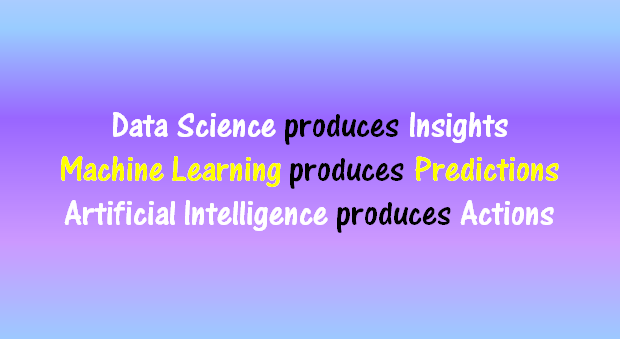

### ***Hurrah! I have successfully completed my Machine Learning Capstone Project !!!***